# <font color=brown><center>__Movie Industry.__</center></font>

<img src='https://redtea.com/wp-content/uploads/2017/08/52004697_l_900x523.jpg' width="800" height="400" align="center"/>



#### <div style='text-align: justify'> The bases for this project are the current changes of the technology and of course the new ways of doing some things that in the past were just unimaginables. In this case I am specifically talking about cinema, the new technologies are moving the cinema to a new era of special effects and my hypothesis is that this is affecting principally the budget of the lastest movies and on another hand this is affecting the gross. </div>


#### <div style='text-align: justify'> After analysing the hypothesis, the main idea is to countinue analsying other interesting data. This would be explained on every step of this lab. </div>

<br>
<div style='text-align: right'>Author: Diego Quiroz Carmona </div>
<div style='text-align: right'>Database: https://www.kaggle.com/danielgrijalvas/movies </div>

__First i imported all the libraries i would use.__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
%matplotlib inline
import plotly.plotly as py
import cufflinks as cf

In [2]:
cf.go_offline()

__After downloading the database, i read it on a Dataframe with pandas.__

In [3]:
movies = pd.read_csv('../movies.csv')
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


__Lets check if the dataframe has nulls and also the type of each column.__

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
budget      6820 non-null float64
company     6820 non-null object
country     6820 non-null object
director    6820 non-null object
genre       6820 non-null object
gross       6820 non-null float64
name        6820 non-null object
rating      6820 non-null object
released    6820 non-null object
runtime     6820 non-null int64
score       6820 non-null float64
star        6820 non-null object
votes       6820 non-null int64
writer      6820 non-null object
year        6820 non-null int64
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


__Now lets check if there are 0 on some columns.__

In [5]:
movies[movies == 0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
budget      2182 non-null float64
company     0 non-null object
country     0 non-null object
director    0 non-null object
genre       0 non-null object
gross       0 non-null float64
name        0 non-null object
rating      0 non-null object
released    0 non-null object
runtime     0 non-null float64
score       0 non-null float64
star        0 non-null object
votes       0 non-null float64
writer      0 non-null object
year        0 non-null float64
dtypes: float64(6), object(9)
memory usage: 799.3+ KB


__As we can see there are 2182 cells with a zero on them, so i would try to cover them with the help of google, scraping the data from the internet.__

In [6]:
#MOVIES WITHOUT BUDGET = mwb
mwb = list(movies.name[movies.budget == 0])

In [7]:
# navegador = webdriver.Chrome()
# navegador.get('https://www.google.com/')
# barra_de_busqueda = navegador.find_element_by_xpath('//*[@id="tsf"]/div[2]/div/div[1]/div/div[1]/input')

In [29]:
# budgets = []
# for i in mwb:
#     barra_de_busqueda.send_keys(i + ' budget')
#     barra_de_busqueda.send_keys(Keys.ENTER)
#     try:
#         budget = navegador.find_element_by_xpath('//*[@id="rso"]/div[1]/div/div[1]/div/div[1]/div[2]/div[2]/div/div[1]/div/div/div[1]')
#         budgets.append(budget.text)
#         navegador.find_element_by_xpath('//*[@id="logo"]/img').click()
#         barra_de_busqueda = navegador.find_element_by_xpath('//*[@id="tsf"]/div[2]/div/div[1]/div/div[1]/input')
#     except:
#         budgets.append('Unknown')
#         navegador.find_element_by_xpath('//*[@id="logo"]/img').click()
#         barra_de_busqueda = navegador.find_element_by_xpath('//*[@id="tsf"]/div[2]/div/div[1]/div/div[1]/input')       

__After trying different ways to solve this problem without success, I decided to continue with the same data that I had at first, I could only scrap some budgets and only the half of them are real numbers, so i dont think is worth to add them to the dataframe.__

__I will add a column named 'Net' that represents the gross minus the budget, where the budget is unkown I will add a 0.__

In [12]:
movies['net'] = np.where(movies.budget != 0, movies.gross - movies.budget,0)

__In order to check the hypothesis, lets creat a timelapse graph of the budget.__

In [13]:
#budget per year
bpy = pd.DataFrame(movies.groupby('year')['budget'].agg(np.mean))
bpy.iplot(kind='line',color='red',width=3, title='Mean budget per year')
bpy.T

year,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
budget,5.157670e+06,5.333539e+06,7.242909e+06,6.832014e+06,8.074623e+06,9.735095e+06,1.079217e+07,1.130423e+07,1.418761e+07,1.565284e+07,...,3.300936e+07,3.473955e+07,34400000.0,3.565689e+07,36461000.0,3.537566e+07,3.726553e+07,3.421409e+07,33790573.4,4.021309e+07


_On this plot we can visualize that the movies mean budget has grown almost 700% from 1986 to 2016._

In [14]:
#Gross per year
gpy = pd.DataFrame(movies.groupby('year')['gross'].agg(np.mean))
gpy.iplot(kind='line',color='orange',width=3, title='Mean gross per year')
gpy.T

year,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
gross,1.428063e+07,1.540484e+07,1.619822e+07,1.851914e+07,20176437.8,1.970720e+07,2.110048e+07,22508567.95,2.305083e+07,2.399934e+07,...,4.185957e+07,4.318205e+07,4.635968e+07,44512519.5,4.407412e+07,4.675185e+07,4.719584e+07,4.688653e+07,4.751462e+07,5.063149e+07


_Meanwhile this plot shows us that the movies mean gross has grown almost 250% in the same lapse._

In [15]:
#Net per year
npy = pd.DataFrame(movies.groupby('year')['net'].agg(np.mean))
npy.iplot(kind='line',color='green',width=3, title='Mean net per year')
npy.T

year,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
net,4.803188e+06,5.793185e+06,5914922.55,7.647232e+06,7.469563e+06,5.715054e+06,6.265403e+06,6.852675e+06,4.977020e+06,4.301305e+06,...,6.135983e+06,7.035953e+06,9.663531e+06,6.491745e+06,6.987250e+06,1.068788e+07,9.522128e+06,1.249060e+07,1.333006e+07,9.896484e+06


_As a result the net mean has grown 150% on those years._

__Now lets see the distribution of the movies in the database.__

In [49]:
#movies distribution
md = movies['year'].item
md

<bound method IndexOpsMixin.item of 0       1986
1       1986
2       1986
3       1986
4       1986
5       1986
6       1986
7       1986
8       1986
9       1986
10      1986
11      1986
12      1986
13      1986
14      1986
15      1986
16      1986
17      1986
18      1986
19      1986
20      1986
21      1986
22      1986
23      1986
24      1986
25      1986
26      1986
27      1986
28      1986
29      1986
        ... 
6790    2016
6791    2016
6792    2016
6793    2016
6794    2016
6795    2016
6796    2016
6797    2016
6798    2016
6799    2016
6800    2016
6801    2016
6802    2016
6803    2016
6804    2016
6805    2016
6806    2016
6807    2016
6808    2016
6809    2016
6810    2016
6811    2016
6812    2016
6813    2016
6814    2016
6815    2016
6816    2016
6817    2016
6818    2016
6819    2016
Name: year, Length: 6820, dtype: int64>



__The hypthesis was correct, the new features in the movie industry, special effects and some ohter costs have exponentially affected the mean budget to shot a film, and in another hand the gross and net has increase but not in the same proportion.__
<br>
<br>
<br>
__Now lets look this same information but by country. The new hypothesis is that the USA should be the country that is investing more in the movie industry.__

In [31]:
#budget per year and country
bpyac = pd.pivot_table(movies,index ='country',
                       values=['budget'],
                       aggfunc=np.sum).sort_values('budget',ascending=False).head(10)
bpyac.iplot(kind='bar',color='red', title='Top 10 movie investing countries')
bpyac.T

country,USA,UK,Germany,France,Canada,Australia,China,New Zealand,Japan,Hong Kong
budget,1.399484e+11,1.235622e+10,3.666250e+09,3.113300e+09,1.893225e+09,1.128290e+09,1.110400e+09,706600000.0,647200000.0,596428966.0


_On this plot we can see that the USA is the country that has invested more money in the movie industry, followed by the UK and Germany._

In [19]:
#gross per year and country
gpyac = pd.pivot_table(movies,index ='country',
                       values=['gross'],
                       aggfunc=np.sum).sort_values('gross',ascending=False).head(10)
gpyac.iplot(kind='bar',color='orange', title='Top 10 movie gross by countries')
gpyac.T

country,USA,UK,Germany,France,Canada,Australia,Japan,China,New Zealand,Hong Kong
gross,1.979349e+11,1.420982e+10,3.199463e+09,3.037067e+09,2.296115e+09,1.623711e+09,1.165490e+09,1.005234e+09,933289753.0,595212447.0


_On this plot we can see that the USA is for long the country with the best gross per movie._

In [20]:
#net per year and country
npyac = pd.pivot_table(movies,index ='country',
                       values=['net'],
                       aggfunc=np.sum).sort_values('net',ascending=False).head(10)
npyac.iplot(kind='bar',color='green', title='Top 10 movie revenue by countries')
npyac.T

country,USA,UK,Australia,Japan,Canada,New Zealand,Taiwan,South Africa,Mexico,Finland
net,4.646775e+10,513052081.0,401698853.0,400460745.0,253757608.0,196891729.0,102378209.0,100178815.0,48409716.0,34509366.0


_As we imagine, USA is the country with the best numbers on the movie industry._

__What about the proportion of budget, gross and net per movie?.__ 

In [23]:
#mean budget per year, country and movie
bpycam = pd.pivot_table(movies,index ='country',
                       values=['budget'],
                       aggfunc=[np.mean,'count']
                       ).sort_values(('count','budget'),
                                     ascending=False).head(10
                                                          ).sort_values(('mean','budget')
                                                                        ,ascending=False)

bpycam.iplot(kind='bar',
                 color={('mean','budget'):'red',('count','budget'):'blue'},
             title='Top 10 movie maker countries')

_Here I decided to take only in count the top 10 countries with more movie productions, then I ordered them by the mean per movie. In resume we can notice that the USA has spent more money per movie, but Germany is very close too._

In [25]:
#mean gross per year, country and movie
bpycam = pd.pivot_table(movies,index ='country',
                       values=['gross'],
                       aggfunc=[np.mean,'count']
                       ).sort_values(('count','gross'),
                                     ascending=False).head(10
                                                          ).sort_values(('mean','gross')
                                                                        ,ascending=False)

bpycam.iplot(kind='bar',
             color={('mean','gross'):'orange',('count','gross'):'blue'},
             title='Top 10 movie maker countries')

In [27]:
#net per year, country and movie
bpycam = pd.pivot_table(movies,index ='country',
                       values=['net'],
                       aggfunc=[np.mean,'count']
                       ).sort_values(('count','net'),
                                     ascending=False).head(10
                                                          ).sort_values(('mean','net')
                                                                        ,ascending=False)

bpycam.iplot(kind='bar',
             color={('mean','net'):'green',('count','net'):'blue'},
             title='Top 10 movie maker countries')

__Now I want to know which are the top 10 movie maker companies.__

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning:

using a dict with renaming is deprecated and will be removed in a future version



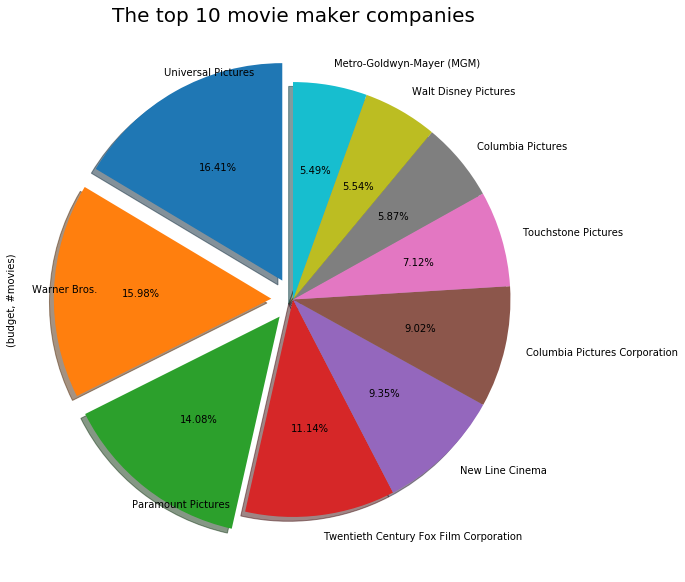

In [28]:
mmc = movies.groupby('company').agg(
    {'budget':{'#movies':'count'}}).sort_values(
    ('budget','#movies')
    ,ascending=False
).head(10)
explode = (0.1, 0.1, 0.1, 0,0,0,0,0,0,0)
mmc.plot.pie(('budget','#movies'), 
             labels=mmc.index, 
             shadow=True, 
             startangle=90,
             figsize=(10,10),
             fontsize=10,autopct='%1.2f%%',
             explode=explode,
             center=(10,0),
             legend=False
            )
plt.title('The top 10 movie maker companies',fontsize=20)
plt.show()